<a href="https://colab.research.google.com/github/Angela-Villarreal/Colab-del-Bootcamp-de-IA/blob/main/Proyecto_de_Rutas_Optimas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de Rutas Óptimas Basadas en el Perfil del Usuario y su Rutina Diaria**

**Objetivo general:** Desarrollar un modelo de machine learning utilizando un dataset público de movilidad urbana que permita predecir la ruta más adecuada entre varias opciones, considerando la ubicación actual del usuario, el horario y sus destinos habituales.

**Objetivos específicos:**

1. Predecir la velocidad promedio del tráfico en diferentes tramos de la ciudad.

2. Estimar el nivel de congestión vehicular en tiempo real a lo largo de distintas rutas.

3. Clasificar el estado del tráfico (alto, medio o bajo) según condiciones actuales y patrones históricos.

El conjunto de datos que voy a utilizar para realizar el ejercicio es el siguiente: este dataset contiene información recopilada en la ciudad de Nueva York relacionada con la movilidad de los taxistas. Incluye las principales características: **Conteo de Vehículos, Velocidad del Tráfico (km/h), Porcentaje de Ocupación Vial, Estado del Semáforo, Reporte de Accidentes, Puntaje de Sentimiento, Demanda de Transporte Compartido, Disponibilidad de Estacionamiento, Niveles de Emisión (g/km), Consumo de Energía (L/h) y Condición del Tráfico.**

Este archivo ya fue modificado para incluir únicamente los datos necesarios para el análisis. Además, algunas variables categóricas en texto fueron transformadas a valores numéricos con el fin de facilitar los cálculos.

In [ ]:
import pandas as pd
import sklearn
import seaborn as sns
rutas_optimas = pd.read_csv("Rutas_optimas.csv")
rutas_optimas

,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,205,49.893435,82.652780,1,0,-0.609199,2,45,450.760055,19.574337,0
1,202,22.383965,45.829298,2,0,0.965442,16,1,321.800341,5.385554,0
2,252,46.889699,82.772465,2,0,0.289660,16,49,231.152655,10.277477,0
3,37,5.730536,37.695567,0,0,-0.271965,66,10,410.384292,29.243279,0
4,64,61.348034,22.313358,0,0,-0.797606,3,5,364.466342,16.801459,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,266,22.987611,12.670629,2,0,0.698929,87,28,252.070807,7.511153,0
4996,20,75.736987,49.108556,2,0,0.742800,5,0,203.563872,6.681980,1
4997,43,59.492981,78.719110,1,0,0.524574,94,16,71.660296,25.267246,2
4998,88,25.901119,64.690719,1,0,-0.589902,73,5,442.692618,29.467326,2


# **1. Predecir la velocidad promedio del tráfico en diferentes tramos de la ciudad**

In [ ]:
# 1. Definir Y y X
Y = rutas_optimas['Traffic_Speed_kmh']
X = rutas_optimas.drop('Traffic_Speed_kmh', axis=1)

# 2. Renombrar las columnas de X a x1, x2, x3, ...
# Creamos un diccionario con los nuevos nombres
nuevos_nombres_columnas_X = {col: f'x{i+1}' for i, col in enumerate(X.columns)}

# Renombramos las columnas de X
X_renombrado = X.rename(columns=nuevos_nombres_columnas_X)

# 3. Renombrar la Serie Y a 'y' para la visualización
Y_renombrada = Y.rename('y')

# 4. Concatenar el DataFrame X renombrado y la Serie Y renombrada para visualización
# Esto incluirá las columnas renombradas de X (x1, x2, ...) y la columna Y renombrada ('y')
tabla_trafico = pd.concat([X_renombrado, Y_renombrada], axis=1)

# 5. Visualizar la tabla completa con columnas renombradas (x1, x2, ...) y la columna 'y'
display(tabla_trafico.head())

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,205,82.652780,1,0,-0.609199,2,45,450.760055,19.574337,0,49.893435
1,202,45.829298,2,0,0.965442,16,1,321.800341,5.385554,0,22.383965
2,252,82.772465,2,0,0.289660,16,49,231.152655,10.277477,0,46.889699
3,37,37.695567,0,0,-0.271965,66,10,410.384292,29.243279,0,5.730536
4,64,22.313358,0,0,-0.797606,3,5,364.466342,16.801459,1,61.348034


Información y Estadísticas Descriptivas de Traffic_Speed_kmh:
<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Traffic_Speed_kmh
Non-Null Count  Dtype  
--------------  -----  
5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB
None


count    5000.000000
mean       42.111096
std        21.707720
min         5.002789
25%        23.195752
50%        42.191599
75%        60.751760
max        79.997556
Name: Traffic_Speed_kmh, dtype: float64


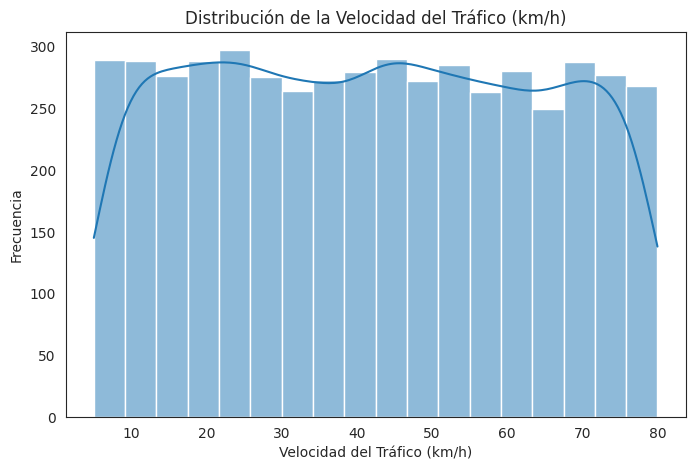

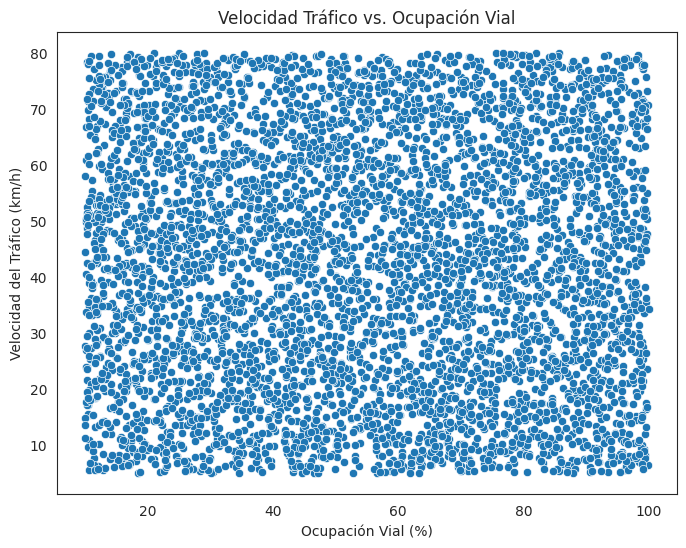

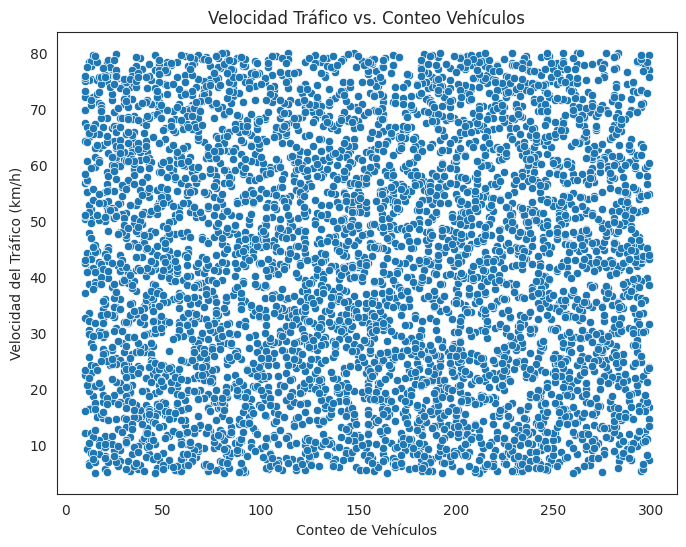

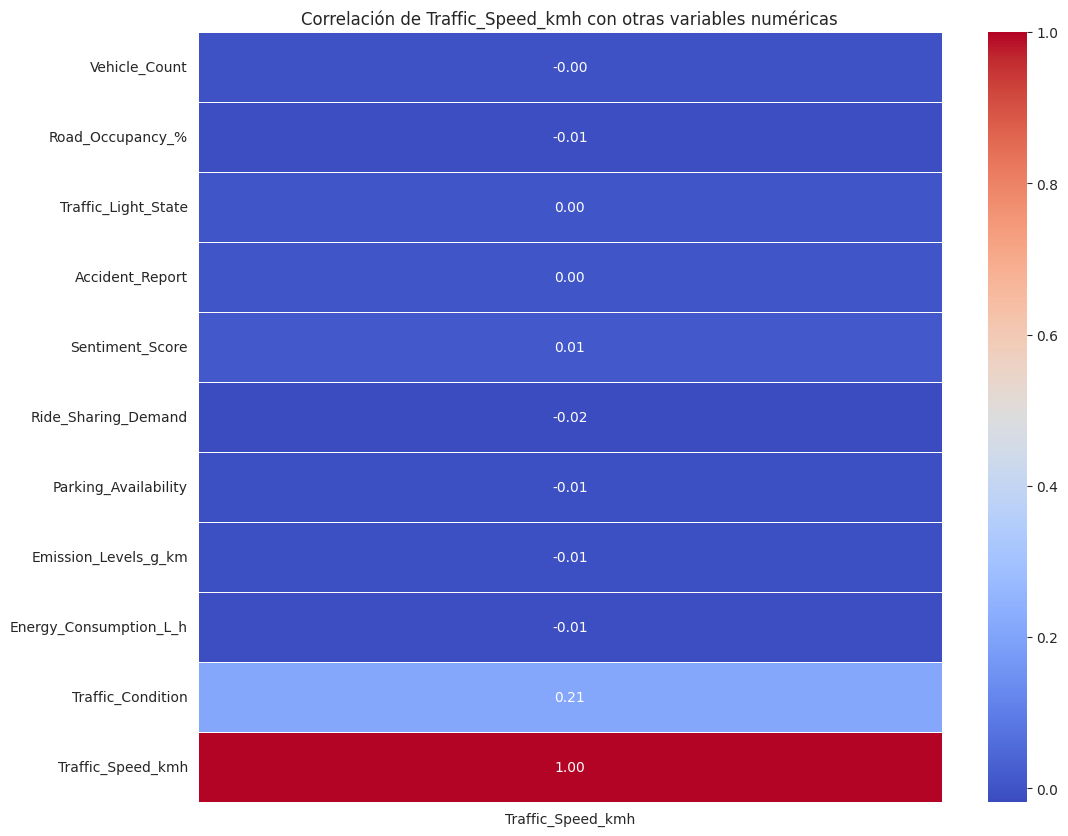

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'rutas_optimas' DataFrame ya está cargado

# 1. Definir Y y X para el primer objetivo
# Y es la velocidad del tráfico a predecir
Y = rutas_optimas['Traffic_Speed_kmh']
# X son las demás columnas como variables predictoras
X = rutas_optimas.drop('Traffic_Speed_kmh', axis=1)

# 2. Mostrar información básica y estadísticas descriptivas de Y
print("Información y Estadísticas Descriptivas de Traffic_Speed_kmh:")
print(Y.info())
print("\n")
print(Y.describe())

# También puedes mostrar info y describe de X si lo deseas, pero para el objetivo principal nos enfocamos en Y
# print("Información y Estadísticas Descriptivas de las variables predictoras (X):")
# print(X.info())
# print("\n")
# print(X.describe())

# 3. Visualizar la distribución de la variable objetivo (Traffic_Speed_kmh)
plt.figure(figsize=(8, 5))
sns.histplot(Y.dropna(), kde=True)
plt.title('Distribución de la Velocidad del Tráfico (km/h)')
plt.xlabel('Velocidad del Tráfico (km/h)')
plt.ylabel('Frecuencia')
plt.show()

# 4. Visualizar la relación entre Traffic_Speed_kmh y algunas variables predictoras clave
# Puedes seleccionar algunas columnas de X que creas que son más relevantes para la velocidad del tráfico
# Por ejemplo, si 'Road_Occupancy_%' y 'Vehicle_Count' son relevantes:
if 'Road_Occupancy_%' in X.columns and 'Traffic_Speed_kmh' in rutas_optimas.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=rutas_optimas['Road_Occupancy_%'], y=Y, data=rutas_optimas)
    plt.title('Velocidad Tráfico vs. Ocupación Vial')
    plt.xlabel('Ocupación Vial (%)')
    plt.ylabel('Velocidad del Tráfico (km/h)')
    plt.show()
else:
     print("\nLas columnas 'Road_Occupancy_%' o 'Traffic_Speed_kmh' no se encuentran.")


if 'Vehicle_Count' in X.columns and 'Traffic_Speed_kmh' in rutas_optimas.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=rutas_optimas['Vehicle_Count'], y=Y, data=rutas_optimas)
    plt.title('Velocidad Tráfico vs. Conteo Vehículos')
    plt.xlabel('Conteo de Vehículos')
    plt.ylabel('Velocidad del Tráfico (km/h)')
    plt.show()
else:
     print("\nLas columnas 'Vehicle_Count' o 'Traffic_Speed_kmh' no se encuentran.")


# 5. Matriz de Correlación de la variable objetivo con las variables predictoras numéricas
# Selecciona las columnas numéricas de X para el análisis de correlación
numeric_cols_X = X.select_dtypes(include=['number']).columns.tolist()

# Añade la columna objetivo 'Traffic_Speed_kmh' para ver su correlación con las demás
cols_for_corr = numeric_cols_X + ['Traffic_Speed_kmh']

# Asegúrate de que las columnas seleccionadas existan en el DataFrame original
cols_present = [col for col in cols_for_corr if col in rutas_optimas.columns]

if cols_present:
    correlation_matrix = rutas_optimas[cols_present].corr()
    plt.figure(figsize=(12, 10))
    # Puedes enfocarte en la correlación de 'Traffic_Speed_kmh' con las otras variables
    sns.heatmap(correlation_matrix[['Traffic_Speed_kmh']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlación de Traffic_Speed_kmh con otras variables numéricas')
    plt.show()
else:
    print("\nNo se encontraron columnas numéricas para calcular la matriz de correlación.")

# **2. Estimar el nivel de congestión vehicular en tiempo real a lo largo de distintas rutas.**

In [ ]:
# 1. Definir Y y X
Y = rutas_optimas['Road_Occupancy_%']
X = rutas_optimas.drop('Road_Occupancy_%', axis=1)

# 2. Renombrar las columnas de X a x1, x2, x3, ...
# Creamos un diccionario con los nuevos nombres
nuevos_nombres_columnas_X = {col: f'x{i+1}' for i, col in enumerate(X.columns)}

# Renombramos las columnas de X
X_renombrado = X.rename(columns=nuevos_nombres_columnas_X)

# 3. Renombrar la Serie Y a 'y' para la visualización
Y_renombrada = Y.rename('y')

# 4. Concatenar el DataFrame X renombrado y la Serie Y renombrada para visualización
# Esto incluirá las columnas renombradas de X (x1, x2, ...) y la columna Y renombrada ('y')
tabla_congestion = pd.concat([X_renombrado, Y_renombrada], axis=1)

# 5. Visualizar la tabla completa con columnas renombradas (x1, x2, ...) y la columna 'y'
display(tabla_congestion.head())

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,205,49.893435,1,0,-0.609199,2,45,450.760055,19.574337,0,82.652780
1,202,22.383965,2,0,0.965442,16,1,321.800341,5.385554,0,45.829298
2,252,46.889699,2,0,0.289660,16,49,231.152655,10.277477,0,82.772465
3,37,5.730536,0,0,-0.271965,66,10,410.384292,29.243279,0,37.695567
4,64,61.348034,0,0,-0.797606,3,5,364.466342,16.801459,1,22.313358


Información y Estadísticas Descriptivas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle_Count           5000 non-null   int64  
 1   Traffic_Speed_kmh       5000 non-null   float64
 2   Road_Occupancy_%        5000 non-null   float64
 3   Traffic_Light_State     5000 non-null   int64  
 4   Accident_Report         5000 non-null   int64  
 5   Sentiment_Score         5000 non-null   float64
 6   Ride_Sharing_Demand     5000 non-null   int64  
 7   Parking_Availability    5000 non-null   int64  
 8   Emission_Levels_g_km    5000 non-null   float64
 9   Energy_Consumption_L_h  5000 non-null   float64
 10  Traffic_Condition       5000 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 429.8 KB




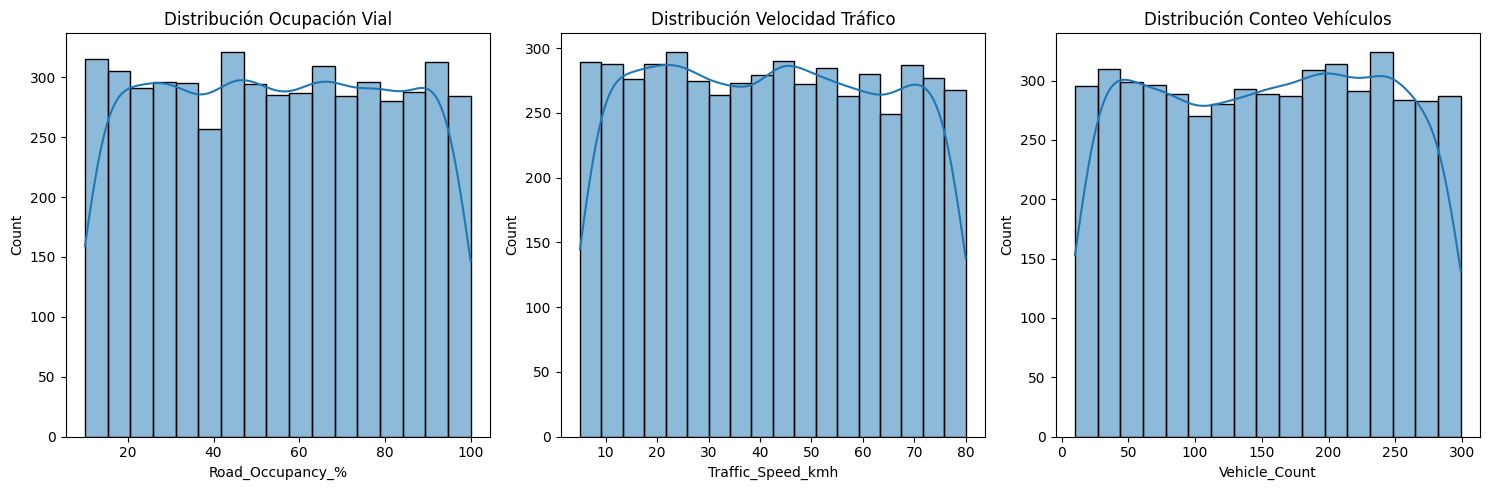

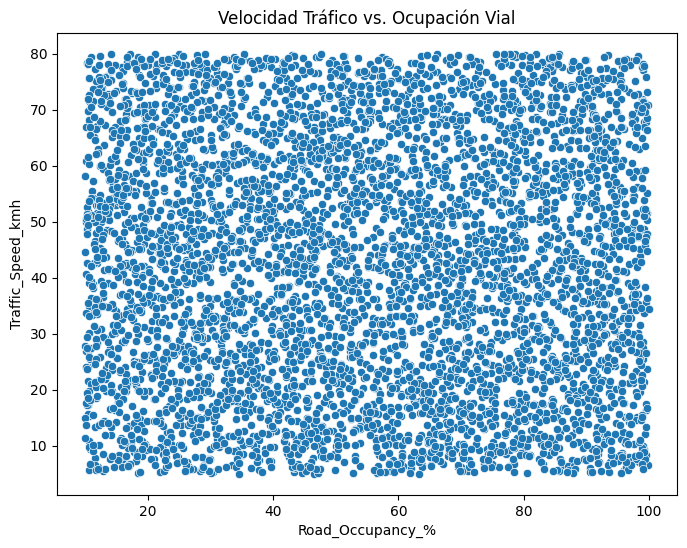

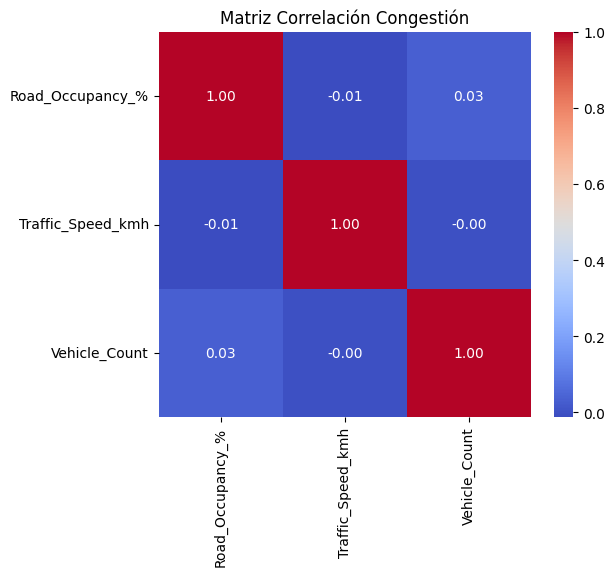

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rutas_optimas' DataFrame is already loaded [1]

# 1. Display basic info and descriptive statistics
print("Información y Estadísticas Descriptivas:")
rutas_optimas.info()
print("\n")
rutas_optimas.describe()

# 2. Visualize key congestion indicators
plt.figure(figsize=(15, 5))

# Distribution of Road Occupancy
if 'Road_Occupancy_%' in rutas_optimas.columns:
    plt.subplot(1, 3, 1)
    sns.histplot(rutas_optimas['Road_Occupancy_%'].dropna(), kde=True)
    plt.title('Distribución Ocupación Vial')
else:
     print("\nLa columna 'Road_Occupancy_%' no se encuentra.")

# Distribution of Traffic Speed
if 'Traffic_Speed_kmh' in rutas_optimas.columns:
    plt.subplot(1, 3, 2)
    sns.histplot(rutas_optimas['Traffic_Speed_kmh'].dropna(), kde=True)
    plt.title('Distribución Velocidad Tráfico')
else:
     print("\nLa columna 'Traffic_Speed_kmh' no se encuentra.")

# Distribution of Vehicle Count
if 'Vehicle_Count' in rutas_optimas.columns:
    plt.subplot(1, 3, 3)
    sns.histplot(rutas_optimas['Vehicle_Count'].dropna(), kde=True)
    plt.title('Distribución Conteo Vehículos')
else:
     print("\nLa columna 'Vehicle_Count' no se encuentra.")

plt.tight_layout()
plt.show()

# 3. Relationship between Road Occupancy and Traffic Speed
if 'Road_Occupancy_%' in rutas_optimas.columns and 'Traffic_Speed_kmh' in rutas_optimas.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Road_Occupancy_%', y='Traffic_Speed_kmh', data=rutas_optimas)
    plt.title('Velocidad Tráfico vs. Ocupación Vial')
    plt.show()
elif 'Road_Occupancy_%' not in rutas_optimas.columns:
     print("\nLa columna 'Road_Occupancy_%' no se encuentra.")
elif 'Traffic_Speed_kmh' not in rutas_optimas.columns:
     print("\nLa columna 'Traffic_Speed_kmh' no se encuentra.")


# 4. Correlation Matrix of key numerical features
numeric_cols_congestion = ['Road_Occupancy_%', 'Traffic_Speed_kmh', 'Vehicle_Count'] # Focus on these for congestion
numeric_cols_present = [col for col in numeric_cols_congestion if col in rutas_optimas.columns]

if numeric_cols_present:
    correlation_matrix = rutas_optimas[numeric_cols_present].corr()
    plt.figure(figsize=(6, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz Correlación Congestión')
    plt.show()
else:
    print("\nNo se encontraron columnas numéricas clave para la correlación.")

# **3. Clasificar el estado del tráfico (alto, medio o bajo) según condiciones actuales y patrones históricos.**

In [ ]:
# 1. Definir Y y X
Y = rutas_optimas['Traffic_Condition']
X = rutas_optimas.drop('Traffic_Condition', axis=1)

# 2. Renombrar las columnas de X a x1, x2, x3, ...
# Creamos un diccionario con los nuevos nombres
nuevos_nombres_columnas_X = {col: f'x{i+1}' for i, col in enumerate(X.columns)}

# Renombramos las columnas de X
X_renombrado = X.rename(columns=nuevos_nombres_columnas_X)

# 3. Renombrar la Serie Y a 'y' para la visualización
Y_renombrada = Y.rename('y')

# 4. Concatenar el DataFrame X renombrado y la Serie Y renombrada para visualización
# Esto incluirá las columnas renombradas de X (x1, x2, ...) y la columna Y renombrada ('y')
tabla_estado_semaforo = pd.concat([X_renombrado, Y_renombrada], axis=1)

# 5. Visualizar la tabla completa con columnas renombradas (x1, x2, ...) y la columna 'y'
display(tabla_estado_semaforo.head())

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,205,49.893435,82.652780,1,0,-0.609199,2,45,450.760055,19.574337,0
1,202,22.383965,45.829298,2,0,0.965442,16,1,321.800341,5.385554,0
2,252,46.889699,82.772465,2,0,0.289660,16,49,231.152655,10.277477,0
3,37,5.730536,37.695567,0,0,-0.271965,66,10,410.384292,29.243279,0
4,64,61.348034,22.313358,0,0,-0.797606,3,5,364.466342,16.801459,1


Mapeo de etiquetas codificadas:
0: 0
1: 1
2: 2


Tamaño del conjunto de entrenamiento: 4000
Tamaño del conjunto de prueba: 1000


Matriz de Confusión:


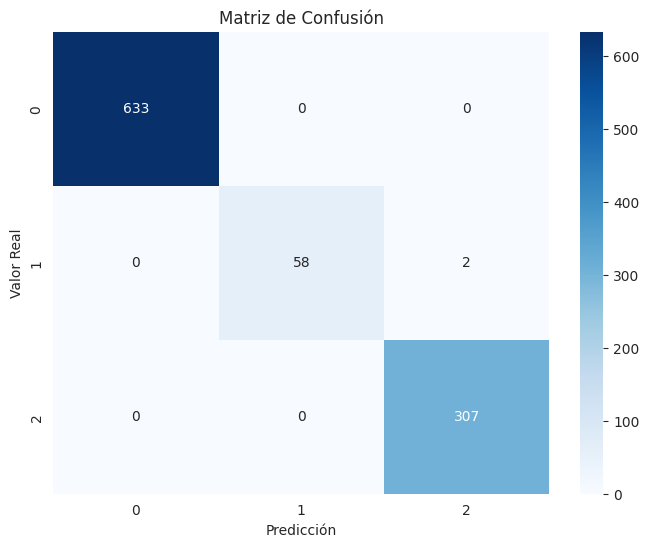


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       633
           1       1.00      0.97      0.98        60
           2       0.99      1.00      1.00       307

    accuracy                           1.00      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'rutas_optimas' es tu DataFrame cargado y preparado
# con la columna 'Traffic_Condition' y otras columnas numéricas como predictoras.

# Eliminar filas con valores nulos en las columnas relevantes para la clasificación
# Esto es importante para evitar errores en el entrenamiento del modelo.
columnas_relevantes = rutas_optimas.select_dtypes(include=['number']).columns.tolist() + ['Traffic_Condition']
rutas_optimas_cleaned = rutas_optimas.dropna(subset=columnas_relevantes)

# 1. Definir la variable objetivo (Y) y las variables predictoras (X)
# Aquí usamos todas las columnas numéricas como predictoras, excepto la variable objetivo si es numérica.
# Si 'Traffic_Condition' es la única columna no numérica relevante para Y, se excluye.
# Aseguramos que X solo contenga columnas numéricas para el modelo.
X = rutas_optimas_cleaned.select_dtypes(include=['number'])
Y = rutas_optimas_cleaned['Traffic_Condition']

# Asegurarnos de que la variable objetivo no esté en las predictoras X si es numérica
if 'Traffic_Condition' in X.columns:
    X = X.drop('Traffic_Condition', axis=1)


# 2. Codificar la variable objetivo 'Traffic_Condition'
# Usaremos LabelEncoder para convertir las etiquetas de texto (Alto, Medio, Bajo) a números.
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Puedes ver el mapeo de las etiquetas
print("Mapeo de etiquetas codificadas:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")
print("\n")


# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")
print("\n")

# 4. Entrenar un modelo de clasificación (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# 5. Realizar predicciones sobre el conjunto de prueba
Y_pred = model.predict(X_test)

# 6. Evaluar el modelo y obtener la matriz de confusión
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Matriz de Confusión:")
# Para una mejor visualización, puedes usar seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# También puedes ver un reporte de clasificación con precisión, recall y F1-score
print("\nReporte de Clasificación:")
# Convertir las clases a strings para asegurar compatibilidad con classification_report
target_names_str = [str(c) for c in label_encoder.classes_]
print(classification_report(Y_test, Y_pred, target_names=target_names_str)) # Modificado aquí

In [ ]:
# 7. Calcular el porcentaje de error
# Obtener el número total de predicciones
total_predicciones = len(Y_test)

# Obtener el número de predicciones correctas (suma de la diagonal de la matriz de confusión)
predicciones_correctas = conf_matrix.diagonal().sum()

# Calcular el número de predicciones incorrectas
predicciones_incorrectas = total_predicciones - predicciones_correctas

# Calcular el porcentaje de error
porcentaje_error = (predicciones_incorrectas / total_predicciones) * 100

print(f"\nPorcentaje de error del modelo: {porcentaje_error:.2f}%")


Porcentaje de error del modelo: 0.20%
